# 2022/1/4
# 本代码绘制论文version1.2中的Fig10
# 内容为：a 控制实验与敏感性实验的925hPa 4月温度场之差
#         b 气压梯度力之差
#         c 越赤道气流强度演变图

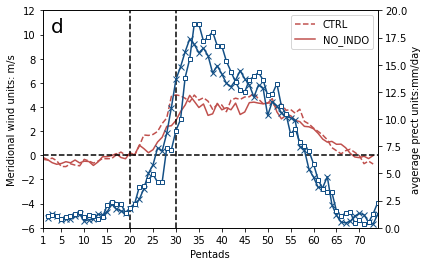

In [8]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *  

path    =  "/home/sun/qomo-data/zhuang_plev/"

level   =  950

f1      =  xr.open_dataset(path+"plev_con_U.nc").sel(lev=level)
f2      =  xr.open_dataset(path+"plev_con_V.nc").sel(lev=level)
f3      =  xr.open_dataset(path+"plev_id_U.nc").sel(lev=level)
f4      =  xr.open_dataset(path+"plev_id_V.nc").sel(lev=level)

# 生成一个数组储存单层气流
u_con      =  f1.U
v_con      =  f2.V
u_id       =  f3.U
v_id       =  f4.V

# 降水数据
prect_con  =  xr.open_dataset(path+"famil_zhuang_con_prect.nc").prect
prect_id   =  xr.open_dataset(path+"famil_zhuang_id_prect.nc").prect

# 设计个给出经纬度计算区域平均的函数
def cal_regional_average(var,axis_turple):
    average_data  =  np.zeros((var.shape[0]))

    for i in range(0,var.shape[0]):
        average_data[i]  =  np.nanmean(var.sel(lat=slice(axis_turple[0],axis_turple[1]),lon=slice(axis_turple[2],axis_turple[3])).data[i,:])
    
    return average_data

cross_equator_con   =   np.zeros((6,365))
cross_equator_id    =   np.zeros((6,365))
for i in range(40,100,10):
    cross_equator_con[int((i-40)/10),:]  =  cal_regional_average(v_con,(-5,5,i,i+10))
    cross_equator_id[int((i-40)/10),:]   =  cal_regional_average(v_id,(-5,5,i,i+10))

# 计算区域平均降水
prect_con.data[prect_con.data>100]  =  0
prect_id.data[prect_id.data>100]    =  0
bob_prect_con  =  cal_regional_average(prect_con,(10,25,90,100))
bob_prect_id   =  cal_regional_average(prect_id,(10,25,90,100))

# 这里计算一下降水的侯平均
prect_con_pentad  =  np.zeros((73))
prect_id_pentad   =  prect_con_pentad.copy()

for i in range(0,73):
    prect_id_pentad[i]    =  np.average(np.convolve(bob_prect_id,np.ones(15)/15,mode='same')[i*5:i*5+5],axis=0)
    prect_con_pentad[i]   =  np.average(np.convolve(bob_prect_con,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)
    
con_pentad_cross_56  =  np.array([np.average(cross_equator_con[1,i*5:i*5+5],axis=0) for i in range(0,73)])
con_pentad_cross_89  =  np.array([np.average(cross_equator_con[4,i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_cross_56   =  np.array([np.average(cross_equator_id[1,i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_cross_89   =  np.array([np.average(cross_equator_id[4,i*5:i*5+5],axis=0) for i in range(0,73)])
con_pentad_prect     =  np.array([np.average(bob_prect_con[i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_prect      =  np.array([np.average(bob_prect_id[i*5:i*5+5],axis=0) for i in range(0,73)])

fig    =  plt.figure()
ax     =  fig.add_subplot(111)
    

ax.plot(con_pentad_cross_89,label="CTRL",color='#c0504d',ls='--')

ax.plot(id_pentad_cross_89,label="NO_INDO",color='#c0504d')

ax.set_xlim((0, 73))
ax.set_ylim((-6, 12))

#设置x轴坐标
x_tick = np.arange(0,73,5)-1
x_tick[0] = 0
x_ticklabel  =  np.arange(0,73,5)
x_ticklabel[0]  =  1
ax.set_xticks(x_tick)
ax.set_xticklabels(x_ticklabel)

ax.plot([0,73],[0,0],'k--')
#ax.plot([0,73],[2,2],'r--')

ax.plot([19,19],[-6,14],'k--')
ax.plot([29,29],[-6,14],'k--')

ax.legend(loc='upper right')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Pentads")

props = dict(boxstyle='square', facecolor='white', edgecolor='white', alpha=1)
ax.text(0.025,0.90,"d",transform=ax.transAxes,bbox=props,fontsize=20)

ax2  =  ax.twinx()
ax2.set_ylim((0,20))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.linspace(1,73,73),con_pentad_prect,color='#134F85',label="CTRL",marker='x',)
ax2.plot(np.linspace(1,73,73),id_pentad_prect,color='#134F85',label="NO_INDO",marker='s',markersize=4,markerfacecolor='white')

plt.savefig('/home/sun/paint/lunwen/version2.0/fig12_v2.0_model_cross_prect.pdf', bbox_inches='tight',dpi=1200)
plt.show()

# 绘制四月的温度图以及气压梯度力

In [3]:
f1  =  xr.open_dataset("/home/sun/qomo-data/zhuang_plev/plev_con_T.nc").sel(lev=950)
con_t_april  =  np.average(f1.T.data[90:120],axis=0)
f2  =  xr.open_dataset("/home/sun/qomo-data/zhuang_plev/plev_id_T.nc").sel(lev=950)
id_t_april   =  np.average(f2.T.data[90:120],axis=0)

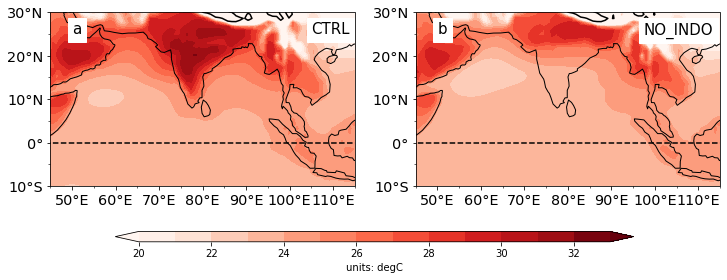

In [17]:
lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,4.8))
spec1   =  fig1.add_gridspec(nrows=1,ncols=2)

ax1 = fig1.add_subplot(spec1[0,0],projection=proj)
ax1.coastlines(resolution='110m',lw=1,zorder=2)
# 设置经纬度刻度.
set_map_ticks(ax1, dx=10, dy=10, nx=1, ny=1,  labelsize='x-large')
ax1.set_extent(extent, crs=proj)
            
ax1.plot([40,120],[0,0],'k--')
im1  =  ax1.contourf(f1.lon,f1.lat,con_t_april-273.15,levels=np.arange(20,34,1),cmap='Reds',alpha=1,extend='both')
im2  =  ax1.contour(f1.lon,f1.lat,con_t_april-273.15,colors='k')

ax1.text(105,25,"CTRL",bbox=props,fontsize=15)
ax1.text(50,25,"a",bbox=props,fontsize=15)

ax1 = fig1.add_subplot(spec1[0,1],projection=proj)
ax1.coastlines(resolution='110m',lw=1,zorder=2)
# 设置经纬度刻度.
set_map_ticks(ax1, dx=10, dy=10, nx=1, ny=1,labelsize='x-large')
ax1.set_extent(extent, crs=proj)
            
ax1.plot([40,120],[0,0],'k--')
im1  =  ax1.contourf(f1.lon,f1.lat,id_t_april-273.15,levels=np.arange(20,34,1),cmap='Reds',alpha=1,extend='both')
im2  =  ax1.contour(f1.lon,f1.lat,id_t_april-273.15,colors='k')

ax1.text(97.5,25,"NO_INDO",bbox=props,fontsize=15)
ax1.text(50,25,"b",bbox=props,fontsize=15)
            

fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im1, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='units: degC')

plt.savefig('/home/sun/paint/lunwen/version2.0/fig12_v2.0_model_950_tem.pdf', bbox_inches='tight',dpi=1200)
plt.show()

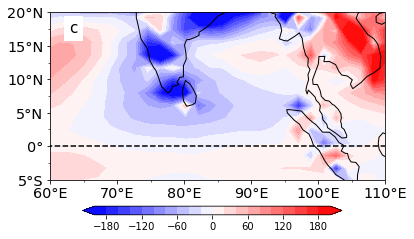

In [16]:
'''
2021/11/11
绘制famil实验中的气压梯度力
'''
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

f = xr.open_dataset("/home/sun/data/pentad_geopotential_height_gradient_con_id.nc").sel(lat=slice(-11,25),lon=slice(55,125),lev=950)

lonmin,lonmax,latmin,latmax  =  60,110,-5,20
extent     =  [lonmin,lonmax,latmin,latmax]
props = dict(boxstyle='square', facecolor='white',edgecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
#os.system("mkdir -p /home/sun/paint/geopotential_gradient")
path  =  '/home/sun/paint/geopotential_gradient/'
j = 0

ax = fig1.add_subplot(projection=proj)
ax.coastlines(resolution='110m',lw=1,zorder=2)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=5, nx=1, ny=1, labelsize='x-large')
ax.set_extent(extent, crs=proj)
im  =  ax.contourf(f.lon[::2],f.lat[::2],np.average(f.pentad_gradient_y_con[19:25,::2,::2],axis=0)*1e6-np.average(f.pentad_gradient_y_id[19:25,::2,::2],axis=0),np.linspace(-200,200,21),cmap  =  create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
ax.plot([40,120],[0,0],'k--')

ax.text(0.055,0.88,"c",transform=ax.transAxes,bbox=props,fontsize=15)
#ax.text(0.85,0.90,"c",transform=ax.transAxes,bbox=props,fontsize=25)


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')

plt.savefig('/home/sun/paint/lunwen/version2.0/fig10_v2.0_model_geopotential_gradient.pdf', bbox_inches='tight',dpi=350)
plt.show()

In [5]:
f

<xarray.Dataset>
Dimensions:                (time: 73, lat: 39, lon: 74)
Coordinates:
  * lon                    (lon) float64 55.78 56.72 57.66 ... 122.3 123.3 124.2
  * lat                    (lat) float64 -10.78 -9.844 -8.906 ... 23.91 24.84
    lev                    float32 950.0
  * time                   (time) float64 1.0 2.0 3.0 4.0 ... 71.0 72.0 73.0
Data variables:
    pentad_gradient_y_con  (time, lat, lon) float64 ...
    pentad_gradient_y_id   (time, lat, lon) float64 ...